In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Top GitHub Languages Used

In [7]:
lang_df = pd.DataFrame(columns=['language','percent_wf','percent_sp','avg_wfs','percent_wf_and_sp'])
overall_wfs = 0
overall_scs = 0
overall_both = 0
overall_repos = 0
for file in os.listdir():
    if file.endswith(".csv"):
        df = pd.read_csv(file)
        percent_workflow = round(df[df['wf_contents'].notnull()].shape[0] / df.shape[0],4) 
        percent_scpolicy = round(df[df['security_policy'].notnull()].shape[0] / df.shape[0],4) 
        wf_df = df[df['wf_contents'].notnull()]
        wf_and_sc = round(wf_df[wf_df['security_policy'].notnull()].shape[0] / df.shape[0],4)
        total_wf = 0
        for index, row in wf_df.iterrows():
            total_wf += row['wf_contents'].count("'active'")
        avg_wfs = round(total_wf / wf_df.shape[0],2)
        lang_df.loc[len(lang_df.index)] = [file.removesuffix('-info.csv'),percent_workflow,percent_scpolicy,avg_wfs,wf_and_sc]
        overall_wfs += wf_df.shape[0]
        overall_scs += df[df['security_policy'].notnull()].shape[0]
        overall_both += wf_df[wf_df['security_policy'].notnull()].shape[0]
        overall_repos += df.shape[0]

In [4]:
lang_df

,language,percent_wf,percent_sp,avg_wfs,percent_wf_and_sp
0,TeX,0.3667,0.0167,2.09,0.0167
1,TypeScript,1.0000,0.4833,8.47,0.4833
2,Shell,0.5167,0.1333,3.84,0.1167
3,C,0.6333,0.2667,7.47,0.2500
4,Python,0.7333,0.2833,5.27,0.2500
5,PHP,0.8500,0.4167,3.61,0.3667
6,CPP,0.7833,0.4500,12.47,0.3667
7,Java,0.6333,0.2500,5.34,0.2500
8,Scala,0.6833,0.1833,4.46,0.1167
9,CoffeeScript,0.1333,0.0167,1.50,0.0000


In [8]:
print(overall_wfs / overall_repos)
print(overall_scs / overall_repos)
print(overall_both / overall_repos)

0.5732484076433121
0.1705046545810877
0.15041646251837335


In [37]:
print(overall_wfs)
print(overall_scs)
print(lang_df['avg_wfs'].mean())
print(lang_df['percent_wf'].mean())

1170
348
4.236176470588235
0.5732382352941175


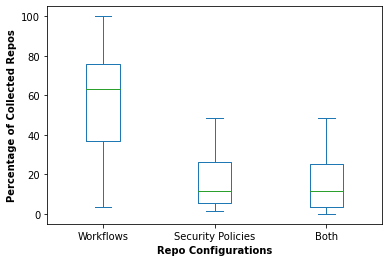

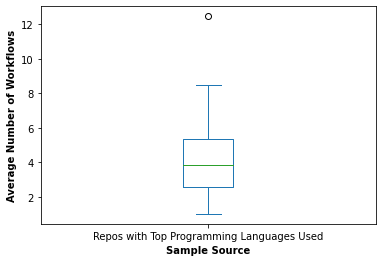

In [30]:
# Plot the dataframe
lang_df[['percent_wf', 'percent_sp', 'percent_wf_and_sp']].plot(kind='box')
plt.ylabel("Percentage of Collected Repos",fontweight='bold')
plt.xticks([1,2,3],labels=['Workflows','Security Policies','Both'])
plt.yticks([0,0.2,0.4,0.6,0.8,1.0],labels=['0','20','40','60','80','100'])
plt.xlabel("Repo Configurations",fontweight='bold')

# Display the plot
plt.show()

# Plot the dataframe
lang_df['avg_wfs'].plot(kind='box')
plt.ylabel("Average Number of Workflows",fontweight='bold')
plt.xticks([1],labels=['Repos with Top Programming Languages Used'])
plt.xlabel('Sample Source',fontweight='bold')
plt.show()

In [13]:
print(lang_df['percent_wf'].mean())
print(lang_df['percent_sp'].mean())
print(lang_df['percent_wf_and_sp'].mean())
print(lang_df['avg_wfs'].mean())

0.5732382352941175
0.17055
0.15046176470588232
4.236176470588235


# Repos with CodeQL Support

In [17]:
codeql_langs = ['C','CPP','CSharp','Java','Go','Kotlin','JavaScript','Ruby','Python','TypeScript']
lang_order = []
vals = []
overall_codeql = 0
for file in os.listdir():
    if file.removesuffix('-info.csv') in codeql_langs:
        lang_order.append(file.removesuffix('-info.csv'))
        df = pd.read_csv(file)
        wf_df = df[df['wf_contents'].notnull()]
        total_codeql = 0
        for index, row in wf_df.iterrows():
            if ("CodeQL" in row['wf_contents']):
                total_codeql += 1
                overall_codeql += 1
        codeql_frac = round(total_codeql / df.shape[0],3)
        vals.append(codeql_frac)
        print(file.removesuffix('-info.csv'),codeql_frac)
print("All repos with CodeQL:",str(overall_codeql / 600))

TypeScript 0.217
C 0.1
Python 0.1
CPP 0.1
Java 0.117
Kotlin 0.017
CSharp 0.1
Ruby 0.1
Go 0.35
JavaScript 0.15
All repos with CodeQL: 0.135


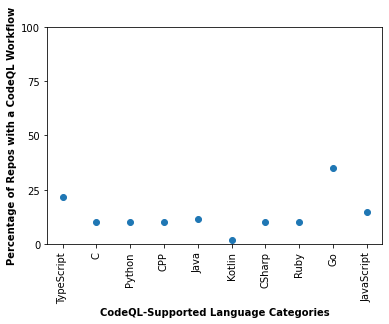

In [32]:
x = [1,2,3,4,5,6,7,8,9,10]
plt.scatter(x,vals)
plt.xticks(x,labels=lang_order,rotation='vertical')
plt.yticks([0,0.25,0.5,0.75,1])
plt.xlabel("CodeQL-Supported Language Categories",fontweight='bold')
plt.ylabel("Percentage of Repos with a CodeQL Workflow",fontweight='bold')
plt.yticks([0,0.25,0.50,0.75,1.00],labels=['0','25','50','75','100'])
plt.show()

In [24]:
sum(vals) / len(vals)

0.1351